![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## 1. Librerias & Google Drive

Para empezar carguemos esas librerias que nos hacen falta

In [1]:
from tensorflow import keras as ks
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

from tensorflow.keras.regularizers import l2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf

from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model

Incorporamos la carpeta de Google Drive para poder "guardar" nuestros modelos

1. Abrir barra lateral de Carpeta
2.  Hacer click en carpeta con logo de Google Drive


In [2]:
# Aquí iria el codigo para conectarse a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Montar la red neuronal 

In [3]:
# Creemos una red que será extracción de features basada en VGG16 entrenada con ImageNet

In [4]:
initializer = ks.initializers.he_normal()
input_tensor = ks.Input(shape=(32, 32, 3))
resized_images = ks.layers.Lambda(lambda image: tf.image.resize(image, (224, 224)))(input_tensor)


In [5]:
vgg = vgg16.VGG16(include_top=False, weights="imagenet",input_shape=(224, 224,3),input_tensor=resized_images)

58900480/58889256 [==============================] - 0s 0us/step


In [6]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584

In [7]:
output = vgg.layers[-1].output
new_output_layer = ks.layers.Flatten()(output)
vgg_model = Model(vgg.input, new_output_layer)

In [8]:
vgg_model.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584

In [9]:
print(vgg_model.trainable)

True


In [10]:
pd.set_option('max_colwidth', None) 
layers= [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer type','Name', 'Trainable?'])

,Layer type,Name,Trainable?
0,<keras.engine.input_layer.InputLayer object at 0x7f2cd5bee610>,input_1,True
1,<keras.layers.core.lambda_layer.Lambda object at 0x7f2cd5c41290>,lambda,True
2,<keras.layers.convolutional.Conv2D object at 0x7f2cd5bda210>,block1_conv1,True
3,<keras.layers.convolutional.Conv2D object at 0x7f2cd5c41550>,block1_conv2,True
4,<keras.layers.pooling.MaxPooling2D object at 0x7f2cd5bc7310>,block1_pool,True
5,<keras.layers.convolutional.Conv2D object at 0x7f2cd5aff250>,block2_conv1,True
6,<keras.layers.convolutional.Conv2D object at 0x7f2cd5aecc10>,block2_conv2,True
7,<keras.layers.pooling.MaxPooling2D object at 0x7f2cc0405f90>,block2_pool,True
8,<keras.layers.convolutional.Conv2D object at 0x7f2cc040b350>,block3_conv1,True
9,<keras.layers.convolutional.Conv2D object at 0x7f2cc0408410>,block3_conv2,True


In [11]:
flag_trainable = False

for layer in vgg_model.layers:
  if layer.name == 'block4_conv1':
    flag_trainable = True
  layer.trainable = flag_trainable

In [12]:
layers= [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer type','Name', 'Trainable?'])


,Layer type,Name,Trainable?
0,<keras.engine.input_layer.InputLayer object at 0x7f2cd5bee610>,input_1,False
1,<keras.layers.core.lambda_layer.Lambda object at 0x7f2cd5c41290>,lambda,False
2,<keras.layers.convolutional.Conv2D object at 0x7f2cd5bda210>,block1_conv1,False
3,<keras.layers.convolutional.Conv2D object at 0x7f2cd5c41550>,block1_conv2,False
4,<keras.layers.pooling.MaxPooling2D object at 0x7f2cd5bc7310>,block1_pool,False
5,<keras.layers.convolutional.Conv2D object at 0x7f2cd5aff250>,block2_conv1,False
6,<keras.layers.convolutional.Conv2D object at 0x7f2cd5aecc10>,block2_conv2,False
7,<keras.layers.pooling.MaxPooling2D object at 0x7f2cc0405f90>,block2_pool,False
8,<keras.layers.convolutional.Conv2D object at 0x7f2cc040b350>,block3_conv1,False
9,<keras.layers.convolutional.Conv2D object at 0x7f2cc0408410>,block3_conv2,False


##Tomo los datos de mis imagenes cifar10

In [13]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_scaled, x_test_scaled = x_train / 255.0, x_test / 255.0

170508288/170498071 [==============================] - 3s 0us/step


In [14]:
y_train = y_train.ravel()



In [15]:
y_test = y_test.ravel()



In [16]:
x_val_scaled = x_train_scaled[-10000:]
y_val = y_train[-10000:]

x_train_scaled = x_train_scaled[:-10000]
y_train_scaled = y_train[:-10000]


In [17]:
x_val = x_train[-10000:]


In [18]:
x_train = x_train[:-10000]

In [19]:
y_train = y_train[:-10000]

In [20]:
# Validamos el resultado
print('Train: X=%s, y=%s' % (x_train_scaled.shape, y_train_scaled.shape))
print('Test: X=%s, y=%s' % (x_test_scaled.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val_scaled.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000,)
Test: X=(10000, 32, 32, 3), y=(10000,)
Validation: X=(10000, 32, 32, 3), y=(10000,)


In [21]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck'
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


# Montamos la red VGG que tenemos arriba + mi capa de clasificacion 

In [22]:
# Definamos el output de salida de la transformacion VGG16
output_from_vgg16 = 25088 #TODO


In [23]:
model_with_vgg = ks.Sequential()

# Apilaremos primero la VGG16
model_with_vgg.add(vgg_model)
kernel_initializer='he_uniform'

model_with_vgg.add(ks.layers.Dense(512, activation='relu',input_shape=(output_from_vgg16, )))
model_with_vgg.add(ks.layers.Dropout(0.3))
model_with_vgg.add(ks.layers.Dense(512, activation='relu'))
model_with_vgg.add(ks.layers.Dropout(0.5))
model_with_vgg.add(ks.layers.Dense(10, activation='softmax'))

model_with_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 25088)             14714688  
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 27,828,042
Trainable params: 26,092,554
No

## 3. Optimizador, función error


In [24]:
from tensorflow.keras.optimizers import Adam

In [25]:
new_adam = Adam(learning_rate=2e-5) 

In [26]:
model_with_vgg.compile(loss='sparse_categorical_crossentropy', optimizer=new_adam, metrics=['accuracy'])

##Callbacks

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
callback_earlystopping = EarlyStopping(monitor='val_loss', patience=10)


##Model checkpoint

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [30]:
callback_modelcheckpoint = ModelCheckpoint('/tmp/modelchk', monitor='val_accuracy', 
                                           verbose=1, save_best_only=True, 
                                           save_weights_only=True)

## 5. Entrenamiento

Ya podemos ponernos a entrenar el modelo!! Ojo, que hemos de entrenar contra los datos convertidos al formato que espera la Convolution.

Empezaremos con 30 epocs, es decir, 30 pasadas completas del dataset (que a su vez sera con mini-batches internamente), fijando un batch de 64

El metodo .fit() nos permite, definir además si disponemos de varias CPUs, GPUs, y si queremos ir validando datos a cada fin de epoch.

In [31]:
history = model_with_vgg.fit(x=x_train_scaled, y=y_train, batch_size=32,
                             epochs=45, callbacks=[callback_modelcheckpoint, callback_earlystopping], 
                             validation_data=(x_val_scaled, y_val))

Epoch 1/45
1250/1250 [==============================] - ETA: 0s - loss: 1.1316 - accuracy: 0.6062
Epoch 1: val_accuracy improved from -inf to 0.79890, saving model to /tmp/modelchk
1250/1250 [==============================] - 171s 128ms/step - loss: 1.1316 - accuracy: 0.6062 - val_loss: 0.5867 - val_accuracy: 0.7989
Epoch 2/45
1250/1250 [==============================] - ETA: 0s - loss: 0.5982 - accuracy: 0.8002
Epoch 2: val_accuracy improved from 0.79890 to 0.84220, saving model to /tmp/modelchk
1250/1250 [==============================] - 159s 128ms/step - loss: 0.5982 - accuracy: 0.8002 - val_loss: 0.4625 - val_accuracy: 0.8422
Epoch 3/45
1250/1250 [==============================] - ETA: 0s - loss: 0.4087 - accuracy: 0.8646
Epoch 3: val_accuracy improved from 0.84220 to 0.86660, saving model to /tmp/modelchk
1250/1250 [==============================] - 159s 128ms/step - loss: 0.4087 - accuracy: 0.8646 - val_loss: 0.3972 - val_accuracy: 0.8666
Epoch 4/45
1250/1250 [==================

## 6. Evaluamos los resultados

Obtengamos una grafica de como el error y la accuracy van evolucionando en cada epoch en los datos de entrenamiento y en la validación

In [32]:
_, acc = model_with_vgg.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 89.250


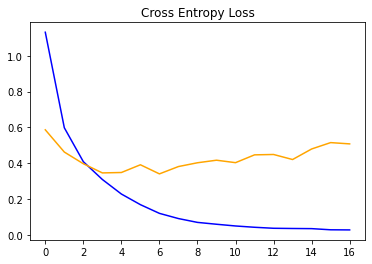

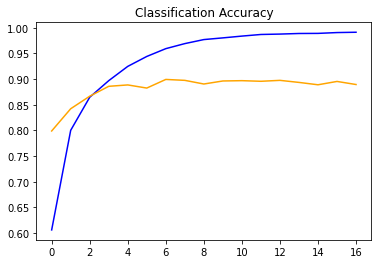

In [33]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.show()

Veamos que tipo de predicciones estoy obteniendo sobre el conjunto de test (vamos a pintar las imagenes y sus clasificaciones)

In [34]:
predictions = model_with_vgg.predict(x_test)

Una de las ventajas de Python es que hay montones de funciones y código realizado por terceras personas. Aquí me he fusilado unas bonitas funciones (que he adaptado un poco a mis necesidades) para poder pintar las imagenes, su label (ground truth) y las clasificaciones que hemos realizado.

## 7. Guardamos el modelo para futuras evaluaciones

Id cambiando los nombres del archivo para ir guardando los diversos proyectos.
Aquí lo guardamos en "local", pero recordad que lo ideal es que lo guardeis en Google Drive (teneis que montar la unidad, fijar la ruta y allí guardar el modelo .h5)

In [35]:
ruta_googledrive = "/content/drive/MyDrive/" # A revisar en vuestra instancia

model.save(ruta_googledrive+'cifar10_base_model.h5')

NameError: ignored